## 1. Data analysis

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import pylab as plot


pd.options.display.max_columns = 100
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [2]:
import argparse
args = argparse.Namespace()
args.raw_train = pd.read_csv("../data/train.csv")
args.raw_test = pd.read_csv("../data/test.csv")
args.train_border_index = 891
args.validation_border_index = 265

In [3]:
print(args.raw_train.describe())
print(args.raw_train.shape)
args.raw_train.head()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(args.raw_test.describe())
print(args.raw_test.shape)
args.raw_test.head()

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data spread

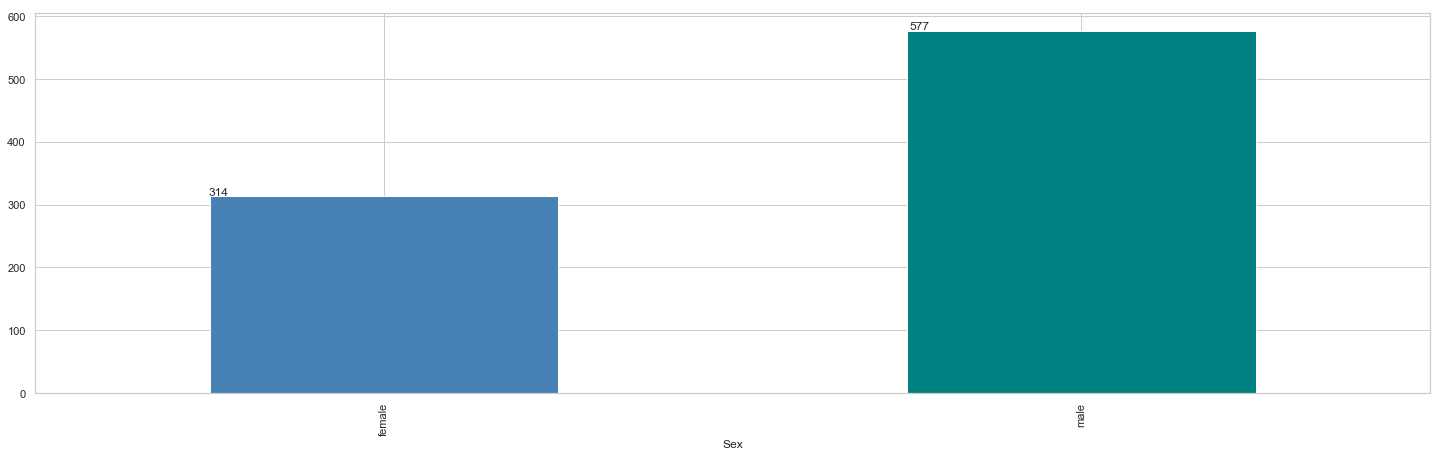

In [39]:
ax = args.raw_train.groupby(['Sex']).agg('count')['PassengerId'].plot(kind='bar', figsize=(25, 7),
                                                                   stacked=True, color=['SteelBlue', 'Teal'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

<Figure size 432x288 with 0 Axes>

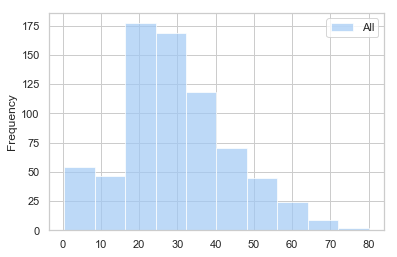

In [34]:
hist_data = pd.DataFrame({'All': args.raw_train['Age']}, columns=['All'])
plt.figure();
hist_data.plot.hist(alpha=0.7)

### Unknown data

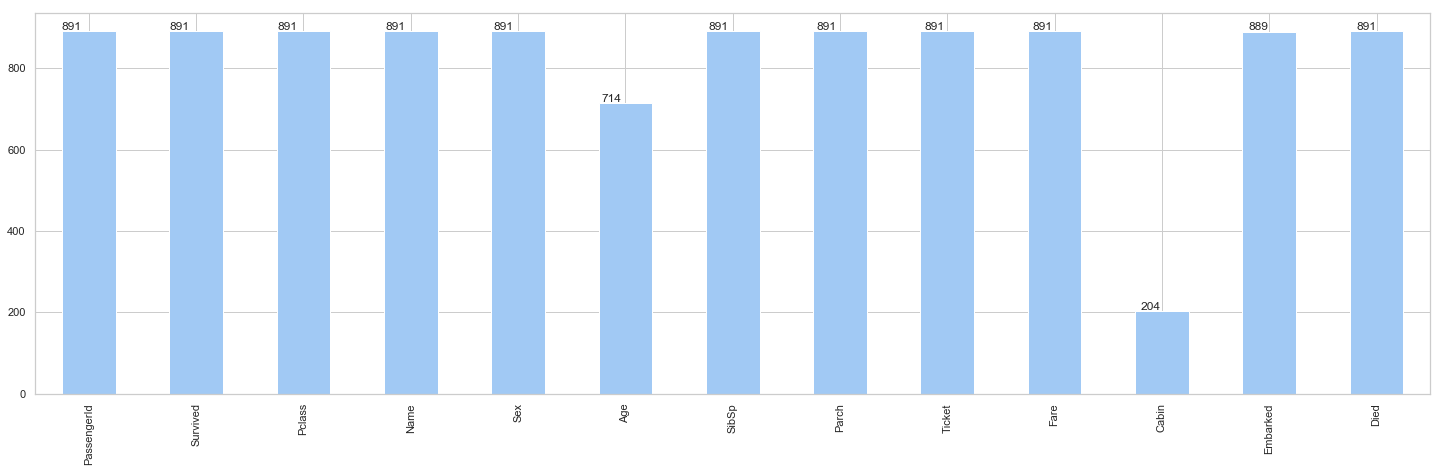

In [41]:
ax = args.raw_train.agg('count').plot(kind='bar', figsize=(25, 7), stacked=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

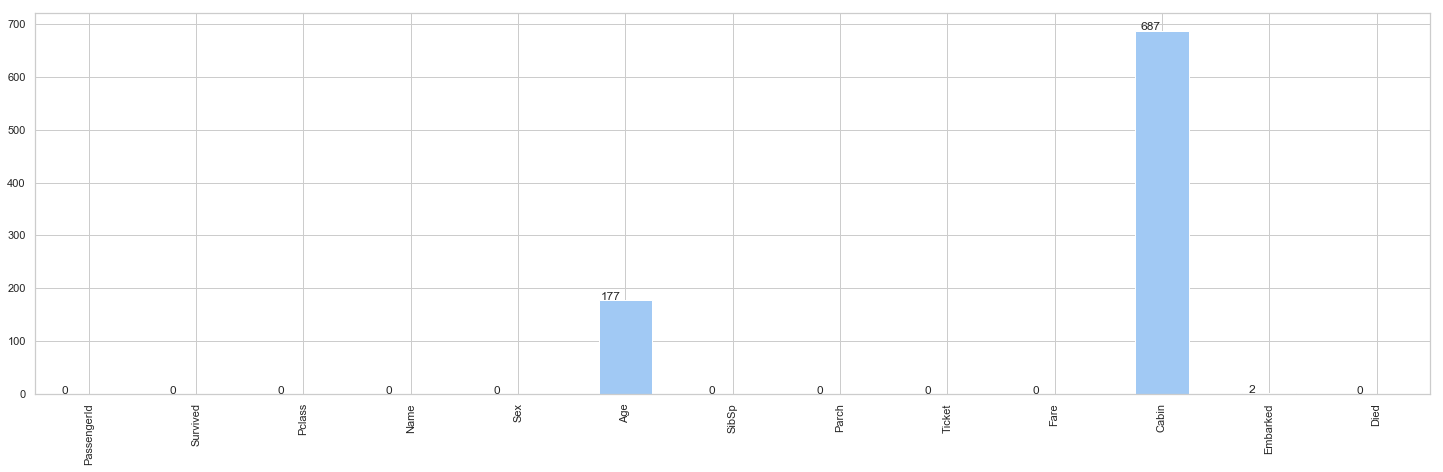

In [78]:
ax = args.raw_train.isna().sum().plot(kind='bar', figsize=(25, 7), stacked=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Survived and sex

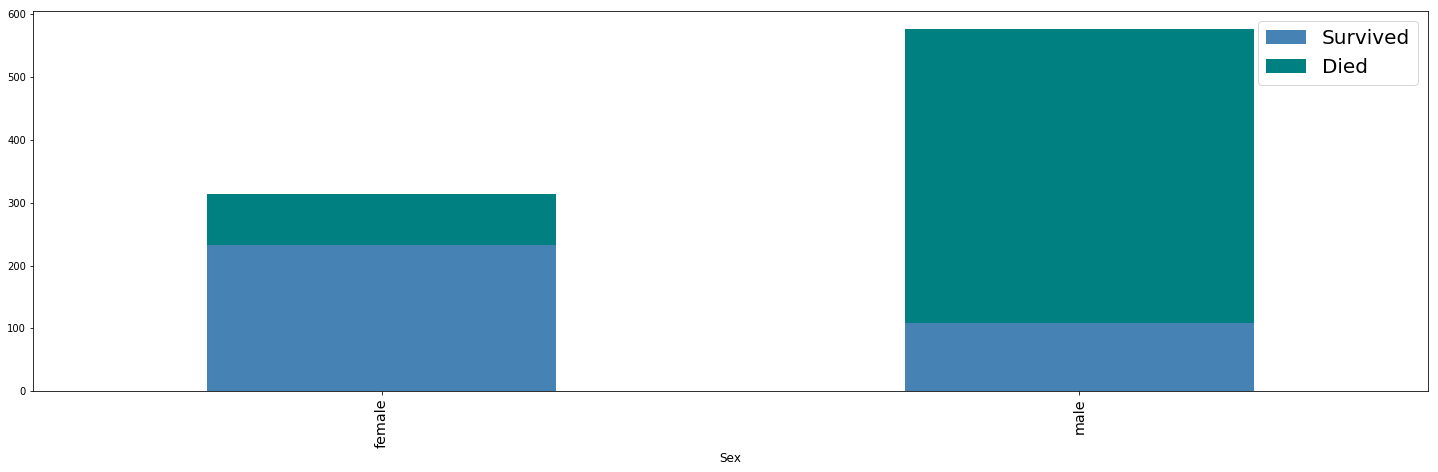

In [5]:
args.raw_train['Died'] = 1 - args.raw_train['Survived']
args.raw_train.groupby(['Sex']).agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                                   stacked=True, color=['SteelBlue', 'Teal'])

### Survived and age

<Figure size 432x288 with 0 Axes>

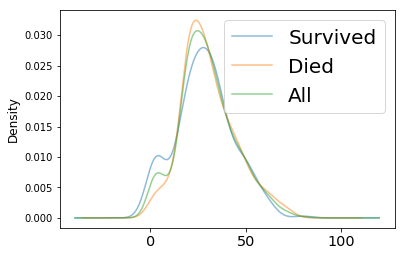

In [6]:
hist_data = pd.DataFrame({'Survived': args.raw_train['Age'][args.raw_train.Survived==1], 
                          'Died': args.raw_train['Age'][args.raw_train.Survived==0],
                          'All': args.raw_train['Age']}, columns=['Survived', 'Died', 'All'])
plt.figure();

hist_data.plot.kde(alpha=0.5)

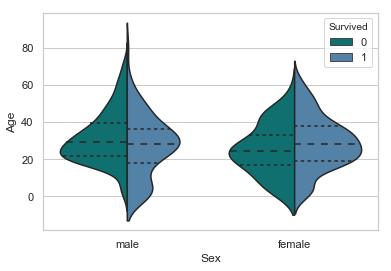

In [12]:

sns.violinplot(x="Sex", y="Age", hue="Survived",
               split=True, inner="quart",
               palette={0: 'Teal', 1: 'SteelBlue'},
               data=args.raw_train)

### Survived and Pclass

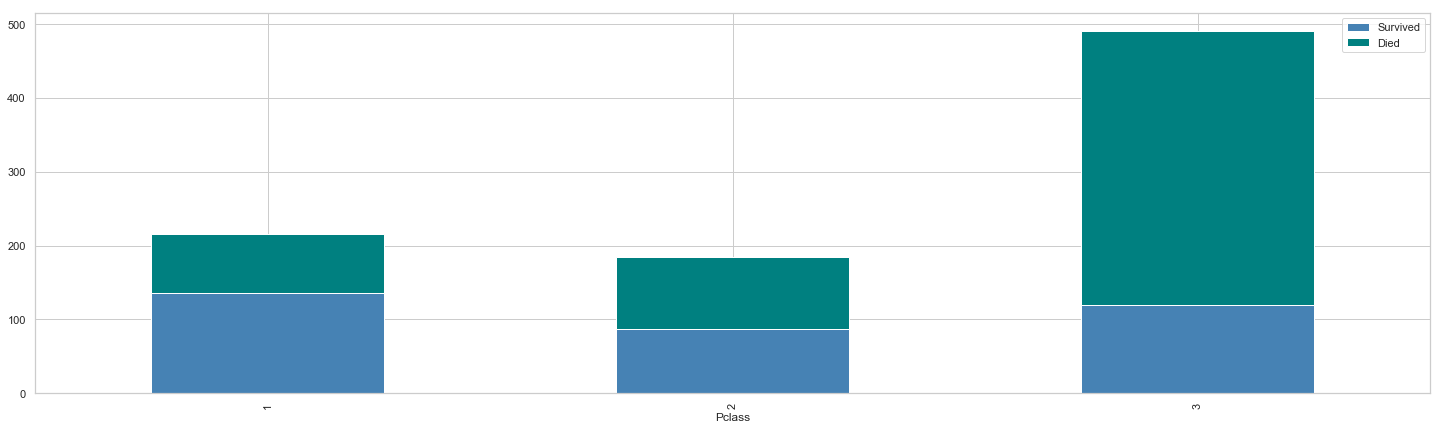

In [19]:
args.raw_train.groupby(['Pclass']).agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                                   stacked=True, color=['SteelBlue', 'Teal'])

### Survived and the number of siblings

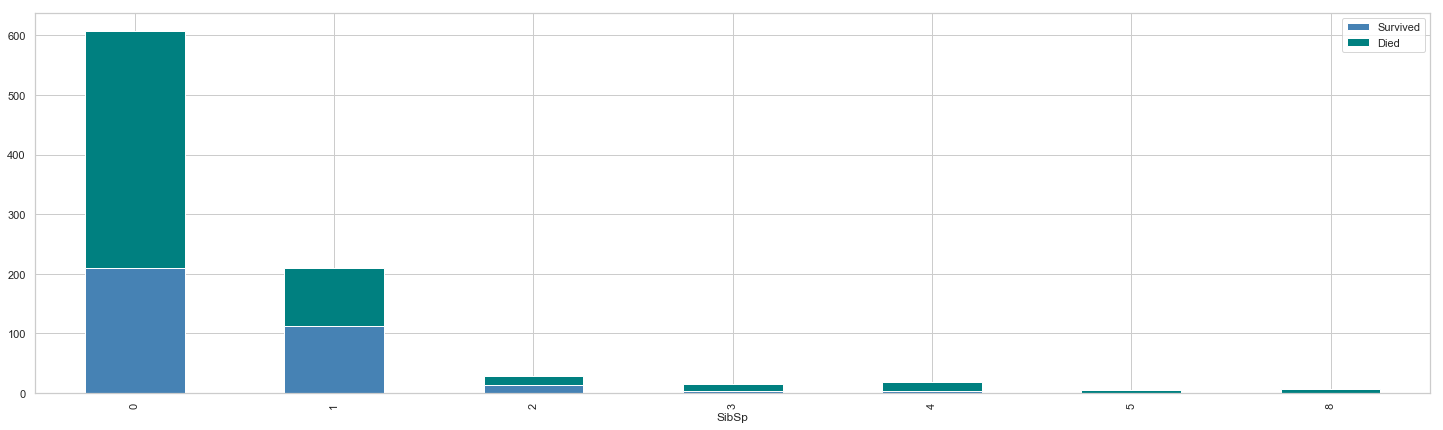

In [22]:
args.raw_train.groupby(['SibSp']).agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                                   stacked=True, color=['SteelBlue', 'Teal'])

### Survived and the number of parents and children

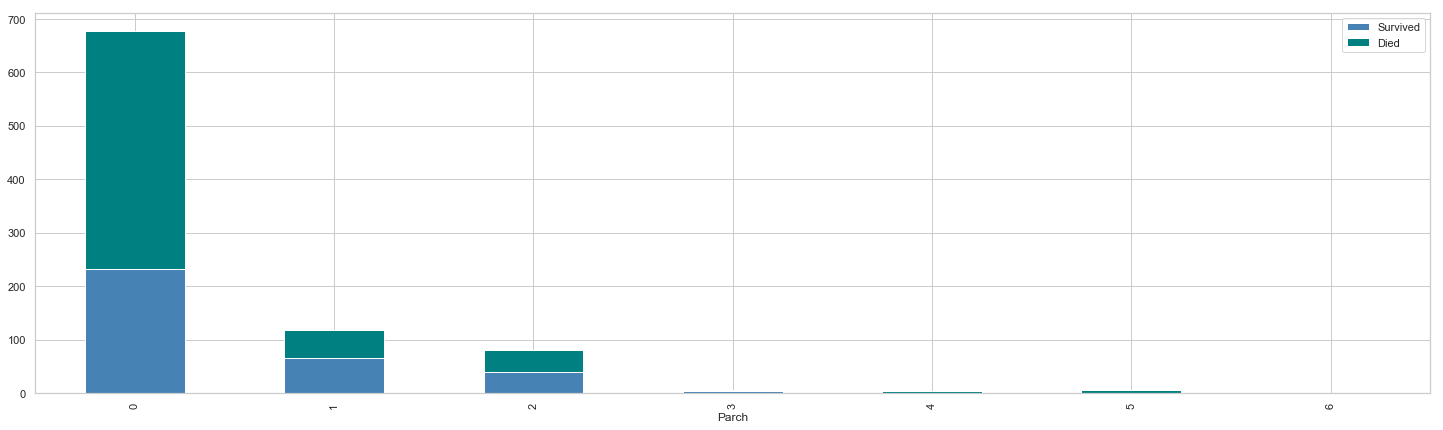

In [23]:
args.raw_train.groupby(['Parch']).agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                                   stacked=True, color=['SteelBlue', 'Teal'])

### Survived and embarked

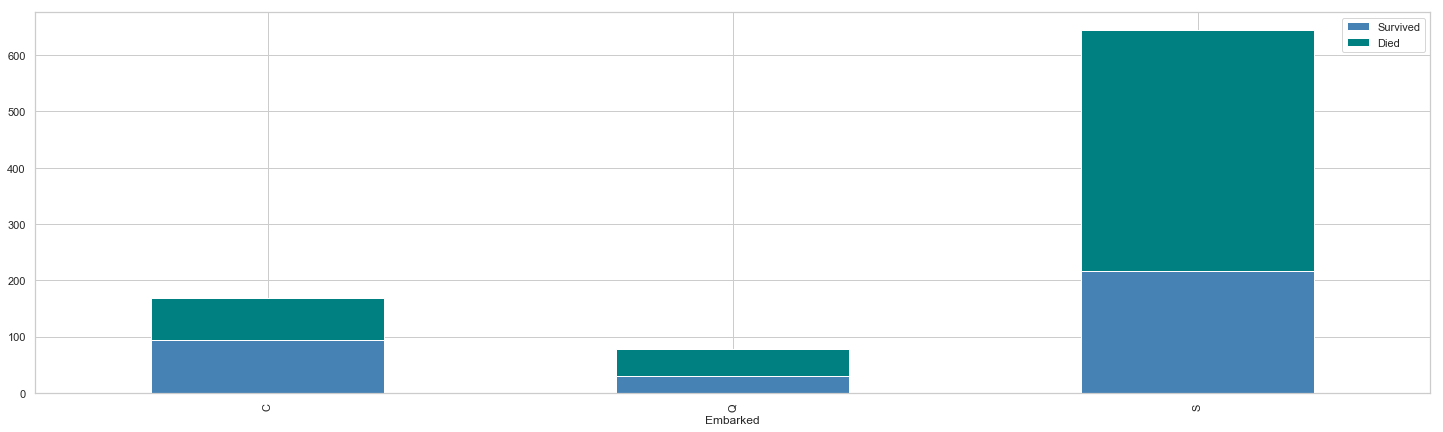

In [24]:
args.raw_train.groupby(['Embarked']).agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                                   stacked=True, color=['SteelBlue', 'Teal'])

In [ ]:
def analyze_training_data(train):
    train['Died'] = 1 - train['Survived']
    train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                                   stacked=True, color=['g', 'r'])
    plt.show()

    train.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                                    stacked=True, color=['g', 'r'])
    plt.show()

    sns.violinplot(x='Sex', y='Age',
                   hue='Survived', data=train,
                   split=True,
                   palette={0: "r", 1: "g"}
                   )
    plt.show()

    plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']],
             stacked=True, color=['g', 'r'],
             bins=50, label=['Survived', 'Dead'])
    plt.xlabel('Fare')
    plt.ylabel('Number of passengers')
    plt.legend()
    plt.show()

    ax = plt.subplot()
    ax.scatter(train[train['Survived'] == 1]['Age'], train[train['Survived'] == 1]['Fare'],
               c='green', s=train[train['Survived'] == 1]['Fare'])
    ax.scatter(train[train['Survived'] == 0]['Age'], train[train['Survived'] == 0]['Fare'],
               c='red', s=train[train['Survived'] == 0]['Fare'])
    plt.show()

    # fare - class correlation
    ax = plt.subplot()
    ax.set_ylabel('Average fare')
    train.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 7), ax = ax)
    plt.show()

    sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=train, split=True, palette={0: "r", 1: "g"})
    plt.show()